In [2]:
import pandas as pd 

# Load SPY data 
df = pd.read_csv("../data/SPY_1Day.csv") 

# Display the first 5 rows 
df.head()



,symbol,ts,open,high,low,close,volume,vwap,trades
0,SPY,2023-01-03 05:00:00+00:00,384.37,386.43,377.8310,380.82,74850731.0,380.745269,590240.0
1,SPY,2023-01-04 05:00:00+00:00,383.18,385.88,380.0000,383.76,85934098.0,383.265078,632808.0
2,SPY,2023-01-05 05:00:00+00:00,381.72,381.84,378.7600,379.38,76970456.0,380.035868,530899.0
3,SPY,2023-01-06 05:00:00+00:00,382.61,389.25,379.4127,388.08,104026233.0,385.902328,685781.0
4,SPY,2023-01-09 05:00:00+00:00,390.37,393.70,387.6700,387.86,73978071.0,390.656766,549428.0


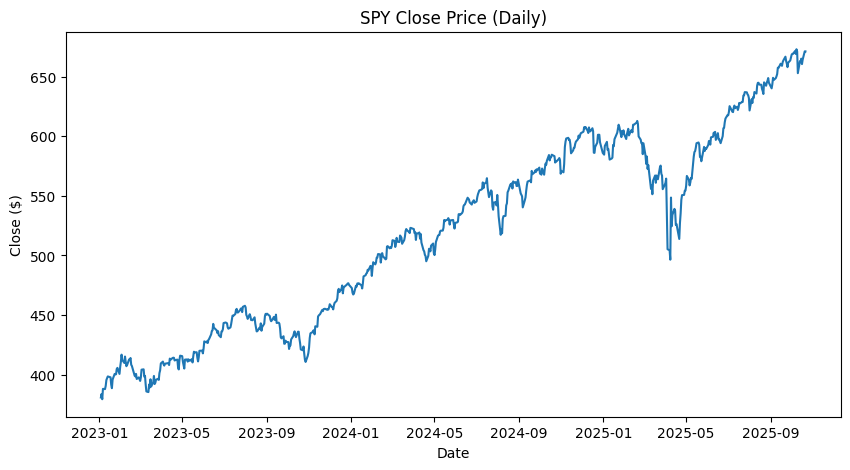

In [3]:
import matplotlib.pyplot as plt

# Ensure timestamps are datetime
df["ts"] = pd.to_datetime(df["ts"])

# Plot close price
plt.figure(figsize=(10,5))
plt.plot(df["ts"], df["close"])
plt.title("SPY Close Price (Daily)")
plt.xlabel("Date")
plt.ylabel("Close ($)")
plt.show()


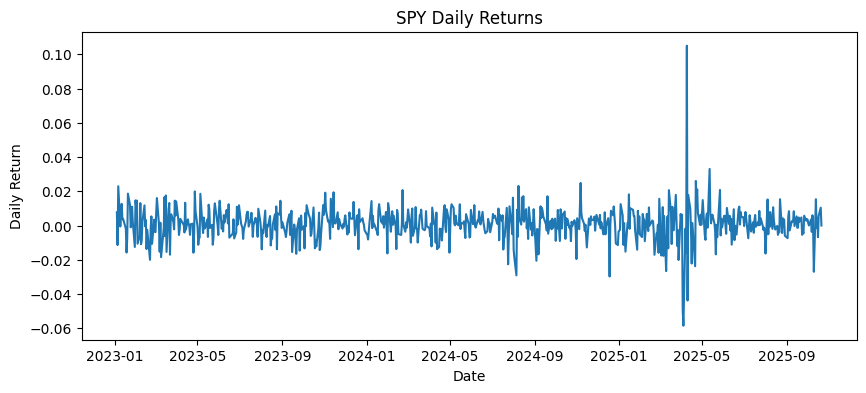

In [4]:
# Calculate simple daily return (% change)
df["return"] = df["close"].pct_change()

# Drop the first row (no prior day)
df = df.dropna(subset=["return"])

# Plot returns
plt.figure(figsize=(10,4))
plt.plot(df["ts"], df["return"])
plt.title("SPY Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()


In [5]:
avg_return = df["return"].mean()
volatility = df["return"].std()

print("Average Daily Return:", round(avg_return * 100, 3), "%")
print("Daily Volatility:", round(volatility * 100, 3), "%")


Average Daily Return: 0.086 %
Daily Volatility: 0.983 %


In [6]:
trading_days = 252
print("Annualized Return:", round(avg_return * trading_days * 100, 2), "%")
print("Annualized Volatility:", round(volatility * (trading_days ** 0.5) * 100, 2), "%")


Annualized Return: 21.57 %
Annualized Volatility: 15.61 %


In [19]:
# Find all days where SPY closed below its 20-day rolling average.
#df.head()
# Calculate a 3-period rolling average
df["Rolling_Avg_20_Periods"] = df["close"].rolling(window=20).mean()
below_avg = df[df["close"] < df["Rolling_Avg_20_Periods"]]
below_avg.head()

,symbol,ts,open,high,low,close,volume,vwap,trades,return,Rolling_Avg_20_Periods
32,SPY,2023-02-17 05:00:00+00:00,406.06,407.51,404.05,407.26,89166502.0,405.822796,561230.0,-0.002498,408.2200
33,SPY,2023-02-21 05:00:00+00:00,403.06,404.16,398.82,399.09,82655924.0,400.691052,559129.0,-0.020061,408.1430
34,SPY,2023-02-22 05:00:00+00:00,399.52,401.13,397.02,398.54,83742293.0,398.939363,568097.0,-0.001378,408.0600
35,SPY,2023-02-23 05:00:00+00:00,401.56,402.20,396.25,400.66,96242399.0,399.539795,740996.0,0.005319,408.0755
36,SPY,2023-02-24 05:00:00+00:00,395.42,397.25,393.64,396.38,108144871.0,395.377676,753684.0,-0.010682,407.6570


<Axes: title={'center': 'SPY Monthly Average Close'}, xlabel='ts'>

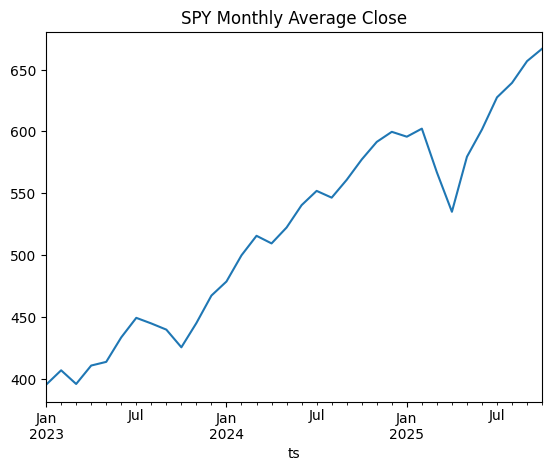

In [21]:
# Convert your daily data into monthly averages of closing prices and plot it.

df["ts"] = pd.to_datetime(df["ts"])
monthly = df.resample("ME", on="ts")["close"].mean()
monthly.plot(title="SPY Monthly Average Close")